<a href="https://colab.research.google.com/github/khodjasCode/for_mohirdev/blob/main/DeepL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import fastai
import torch

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [3]:
im3_sample = threes[100]
im3 = Image.open(im3_sample)
# for showing the image in console we will use PILImage()
im3

In [4]:
im7_sample = sevens[33]
im7 = Image.open(im7_sample)
# for showing the image in console we will use PILImage()
im7

In [5]:
array(im3)[4:10, 4:10] # only in CPU

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   8, 134],
       [  0,   0,  27, 132, 196, 253],
       [  8, 133, 233, 253, 253, 253],
       [ 36, 253, 253, 253, 223, 182],
       [ 36, 253, 253, 222,  41,   0]], dtype=uint8)

In [6]:
tensor(im3)[4:10, 4:10] # GPU acceptable

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   8, 134],
        [  0,   0,  27, 132, 196, 253],
        [  8, 133, 233, 253, 253, 253],
        [ 36, 253, 253, 253, 223, 182],
        [ 36, 253, 253, 222,  41,   0]], dtype=torch.uint8)

In [7]:
import pandas as pd

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:22, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,8,134,254,254,254,254,255,202,21,8,0,0,0,0
2,0,0,27,132,196,253,253,253,253,253,253,253,253,195,70,0,0,0
3,8,133,233,253,253,253,253,253,253,253,253,253,253,253,238,141,11,0
4,36,253,253,253,223,182,182,163,65,65,65,172,252,253,253,253,140,0
5,36,253,253,222,41,0,0,0,0,0,0,0,165,253,253,253,170,0
6,4,54,59,19,0,0,0,0,0,0,0,0,12,253,253,253,121,0
7,0,0,0,0,0,0,0,0,0,0,0,3,239,253,253,252,51,0
8,0,0,0,0,0,0,0,0,0,19,124,191,253,253,249,170,0,0
9,0,0,0,0,0,0,24,42,70,232,253,253,253,253,186,0,0,0


In [8]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

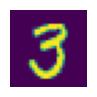

In [9]:
show_image(three_tensors[2])

In [10]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

<Axes: >

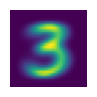

In [11]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3)

<Axes: >

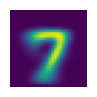

In [12]:
show_image(mean7)

<Axes: >

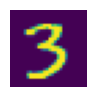

In [13]:
s_3 = stacked_threes[1]
show_image(s_3)

In [14]:
mae = (s_3 - mean3).abs().mean()
rmse = ((s_3 - mean3)**2).mean().sqrt()
mae, rmse

(tensor(0.1114), tensor(0.2021))

In [15]:
mae = (s_3 - mean7).abs().mean()
rmse = ((s_3 - mean7)**2).mean().sqrt()
mae, rmse

(tensor(0.1586), tensor(0.3021))

In [16]:
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

In [17]:
arr, tns

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [18]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [19]:
def mae(a, b):
  return (a-b).abs().mean((-1, -2))

mae(s_3, mean3)

tensor(0.1114)

In [20]:
valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)
valid_3_errors.shape, valid_7_errors.shape

(torch.Size([1010]), torch.Size([1028]))

In [22]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [24]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [25]:
def loss(w):
  return w**2

In [28]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, steps = 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

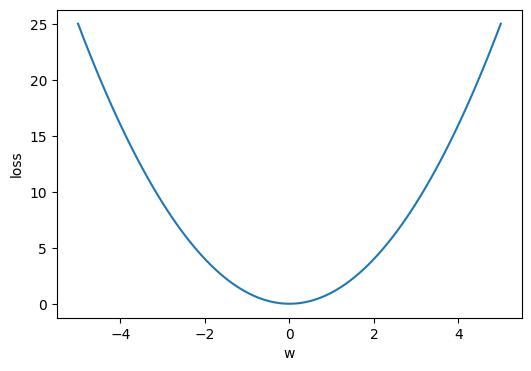

In [29]:
plot_function(loss, 'w', 'loss', min = -5, max = 5)

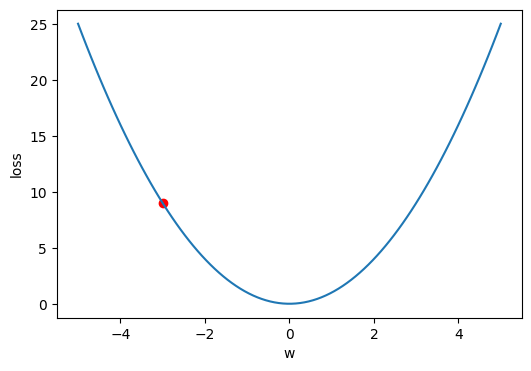

In [30]:
plot_function(loss, 'w', 'loss', min = -5, max = 5)
plt.scatter(-3, loss(-3), color = 'red')

In [31]:
#@title Tangent Line of Parabola { display-mode: "both" }
def parabola_tangent_liner(w):
  # calculating parabola(quadratic)
  def loss(w):
    return w**2

  # slope of the parabola
  def slope(w):
    return 2*w
  # range for plotting parabola
  w_range = np.linspace(-5, 5, 100)

  w = w # assign user defined value
  loss_v = loss(w) # get the value for the user-defined point

  # tangent line according to # y = slope*(x - x1) + y1
  def line(w_range, w, loss_v):
    return slope(w)*(w_range-w)+loss_v

  # range for plotting line
  line_range = np.linspace(w-1, w+1, 20)

  # plotting
  plt.plot(w_range, loss(w_range), color='blue')
  plt.scatter(w, loss_v, color='r', s=50)
  plt.plot(line_range, line(line_range, w, loss_v), 'r--')
  plt.xlabel('w')
  plt.ylabel('loss')

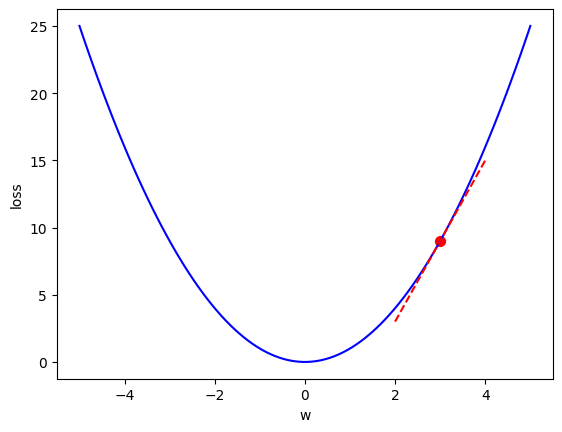

In [34]:
parabola_tangent_liner(3)

In [35]:
w_t = torch.tensor(3., requires_grad=True)
w_t

tensor(3., requires_grad=True)

In [36]:
loss_v = loss(w_t)
loss_v

tensor(9., grad_fn=<PowBackward0>)

In [37]:
loss_v.backward()

The derivative from w**2 is 2*w

In [39]:
w_t.grad

tensor(6.)

In [36]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

Text(0.5, 1.0, 'Roller Coaster Tezligi')

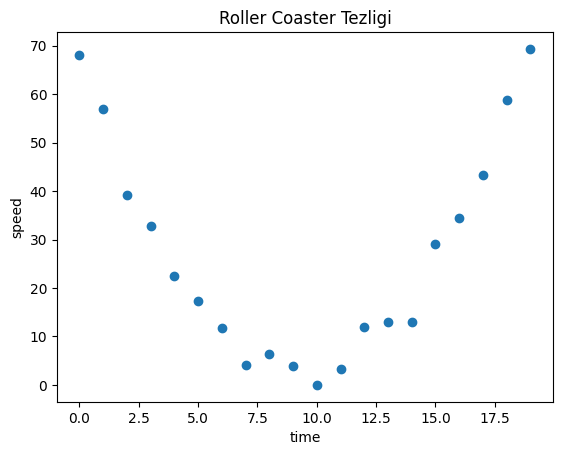

In [37]:
from matplotlib import pyplot as plt
speed = torch.randn(20)*3+0.75*(time-9.5)**2+1

# plotting
plt.scatter(time, speed,)
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Roller Coaster Tezligi')

In [38]:
def f(time, params):
  a, b, c = params
  return a*(time**2) + b*time + c

In [39]:
# MSE
def mse(preds, targets):
  return ((preds - targets)**2).mean()

1 - step:
Initialize (Vaznlarni boshlangish qiymatini yaratib olish)

In [40]:
params = torch.randn(3).requires_grad_()
params

tensor([ 0.0946, -0.9950,  0.0891], requires_grad=True)

2 - step:
Prediction

In [41]:
preds = f(time, params)
preds

tensor([ 0.0891, -0.8113, -1.5224, -2.0443, -2.3769, -2.5202, -2.4742, -2.2390,
        -1.8144, -1.2007, -0.3976,  0.5948,  1.7764,  3.1473,  4.7075,  6.4569,
         8.3956, 10.5236, 12.8409, 15.3474], grad_fn=<AddBackward0>)

3 - step:
Loss ni hisoblash

In [42]:
loss = mse(preds, speed)
loss

tensor(987.2477, grad_fn=<MeanBackward0>)

4 - step:
Gradientni hisoblash

In [43]:
loss.backward(retain_graph=True)
params.grad

tensor([-6390.4707,  -425.0193,   -49.2889])

5 -step: Step

In [44]:
lr = 1e-5
params.data -=lr*params.grad.data
params.grad = None

In [45]:
preds = f(time, params)
# yangi olingan bashorat uchun xatolikni hisoblash
mse(preds, speed)

tensor(692.9176, grad_fn=<MeanBackward0>)

In [46]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [47]:
for epoch in range(10):
  apply_step(params)

692.9176025390625
637.2158813476562
626.6700439453125
624.6689453125
624.2847900390625
624.2067260742188
624.1865234375
624.1773681640625
624.1701049804688
624.1632080078125


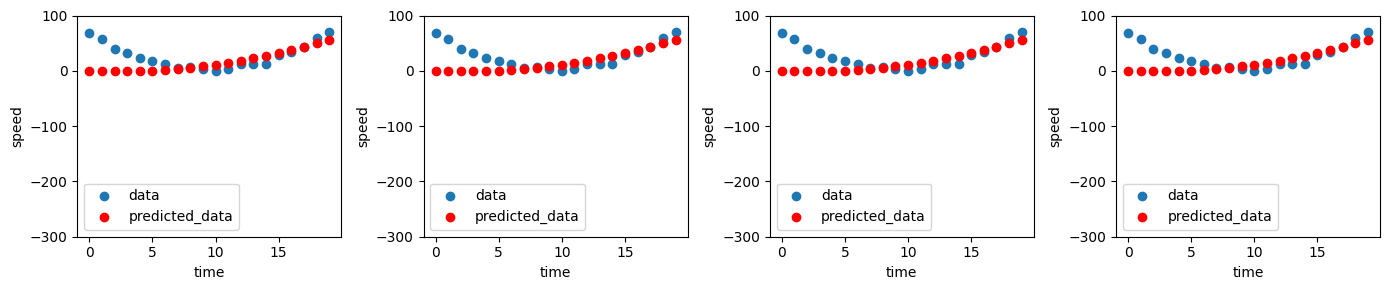

In [48]:
_ , axs = plt.subplots(1, 4, figsize=(14, 3))
for ax in axs:
  show_preds(apply_step(params, prn=False), ax)
plt.tight_layout()